
# Density-Based Clustering — DBSCAN & HDBSCAN (Visual Guide)

This notebook builds synthetic datasets and demonstrates **DBSCAN** and **HDBSCAN** (if installed) with:
- **k-distance plot** to choose `eps` (DBSCAN) and discussion of `min_samples`
- **Parameter sweeps** (eps, min_samples) and stability across seeds
- **Noise handling** (label = -1) and effect of **feature scaling**
- **Cluster validity** on core samples (silhouette on non-noise points)
- **Comparison** to K-Means on non-globular data (moons)
- **HDBSCAN** (optional): `min_cluster_size`, `min_samples`, soft probabilities, and cluster hierarchy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Optional HDBSCAN
try:
    import hdbscan
    HDBSCAN_AVAILABLE = True
except Exception as e:
    HDBSCAN_AVAILABLE = False
    print("HDBSCAN is not installed; cells will skip HDBSCAN demos. To enable: pip install hdbscan")

np.random.seed(2026)

def scatter_labels(X, labels, title=""):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=labels, s=14, alpha=0.9)
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout(); plt.show()

def k_distance_plot(X, k, title="k-distance plot"):
    # Fit NN and plot k-th nearest neighbor distance sorted ascending
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)
    dists, _ = nn.kneighbors(X)
    kth = np.sort(dists[:, -1])
    plt.figure(figsize=(6,4))
    plt.plot(kth)
    plt.title(f"{title} (k={k})")
    plt.xlabel("sorted points"); plt.ylabel("distance to k-th NN")
    plt.tight_layout(); plt.show()

def silhouette_on_nonnoise(X, labels, title="Silhouette (non-noise)"):
    mask = labels != -1
    if mask.sum() <= 1 or len(np.unique(labels[mask])) < 2:
        print("Not enough clustered points for silhouette.")
        return
    score = silhouette_score(X[mask], labels[mask])
    plt.figure(figsize=(6,4))
    plt.bar([0], [score])
    plt.xticks([0], ["silhouette"])
    plt.ylim(0, 1)
    plt.title(f"{title}: {score:.3f}")
    plt.tight_layout(); plt.show()

## 1) Two moons dataset (non-globular shape)

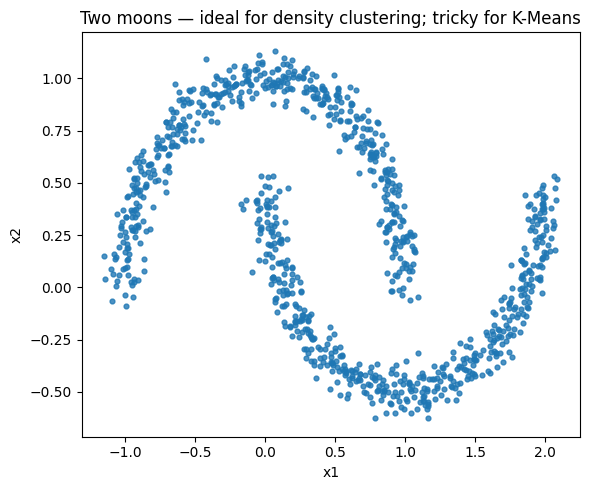

In [ ]:
X_moons, _ = make_moons(n_samples=1000, noise=0.06, random_state=2026)
plt.figure(figsize=(6,5)); plt.scatter(X_moons[:,0], X_moons[:,1], s=12, alpha=0.8)
plt.title("Two moons — ideal for density clustering; tricky for K-Means")
plt.xlabel("x1"); plt.ylabel("x2"); plt.tight_layout(); plt.show()

## 2) k-distance plot (choose eps)

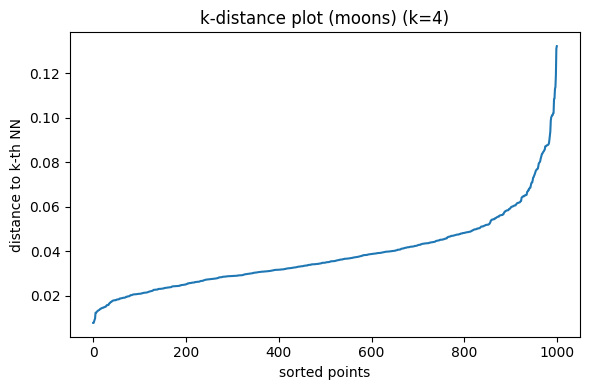

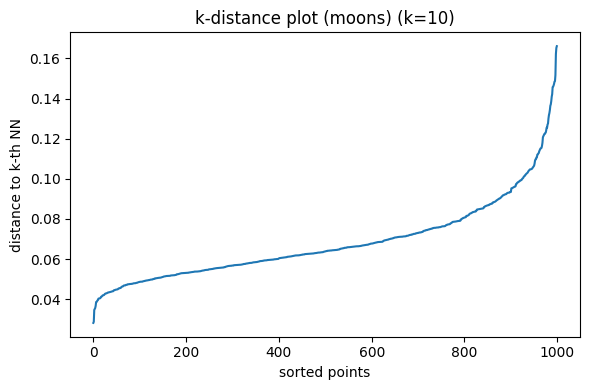

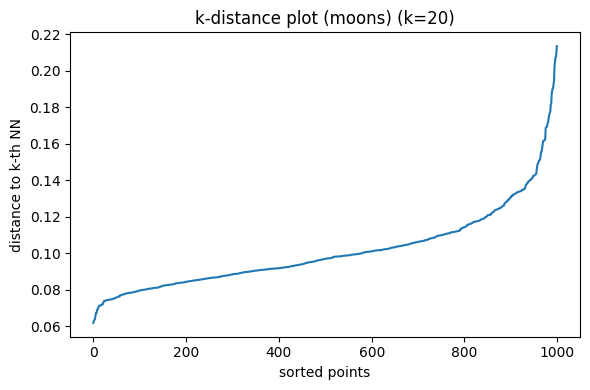

Look for the 'elbow' as a candidate eps.


In [ ]:
# Rule-of-thumb: k ≈ min_samples
for k in [4, 10, 20]:
    k_distance_plot(X_moons, k=k, title="k-distance plot (moons)")
print("Look for the 'elbow' as a candidate eps.")

## 3) DBSCAN parameter sweep on moons

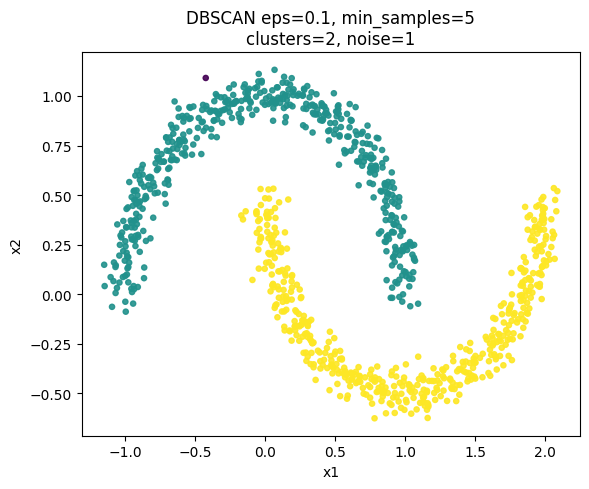

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


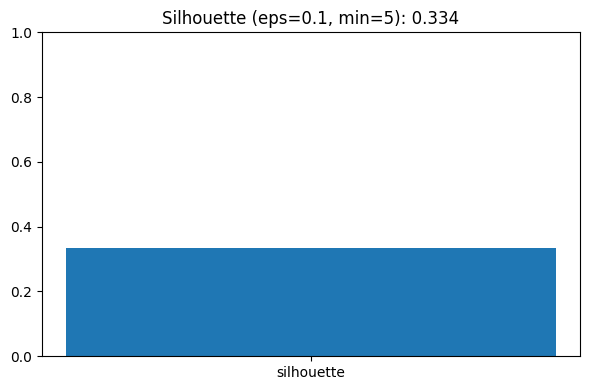

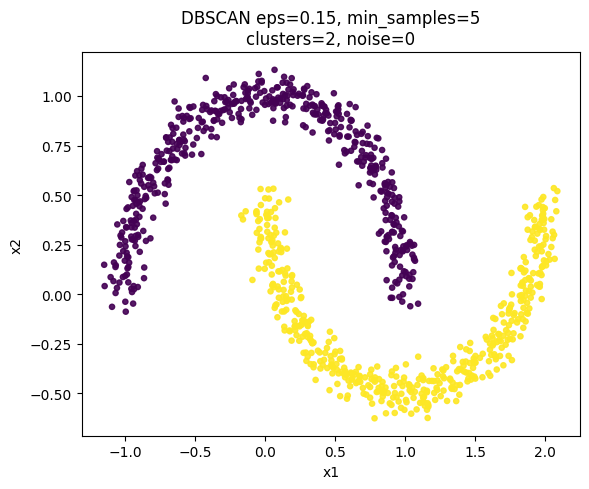

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


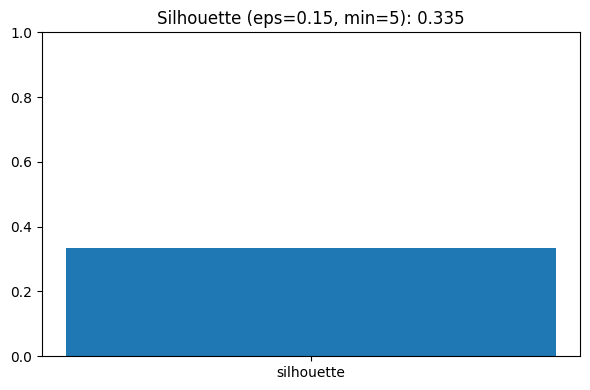

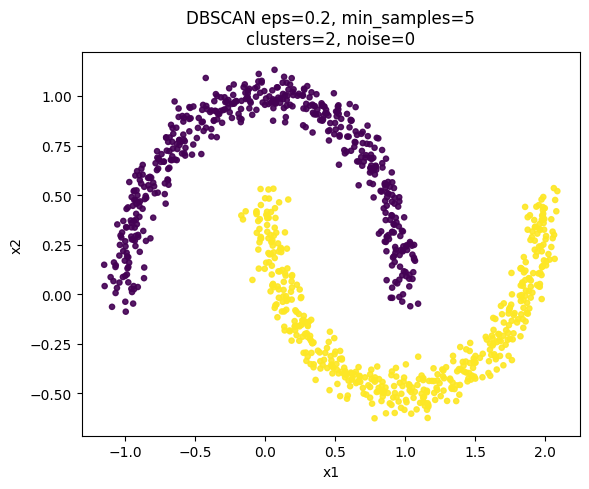

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


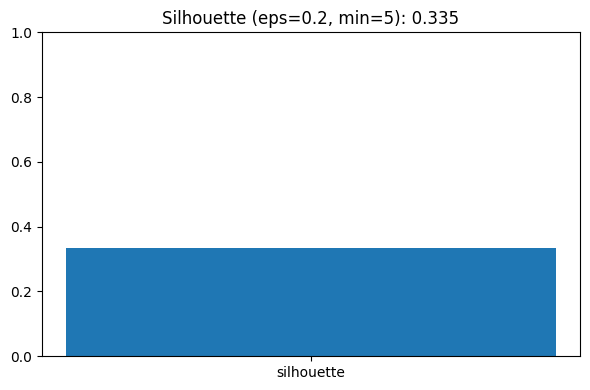

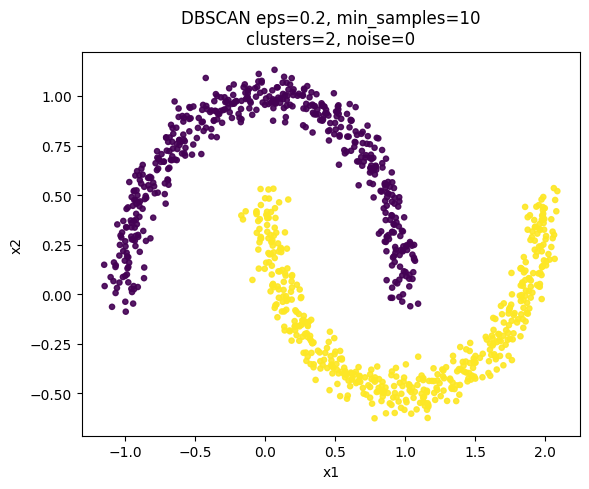

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


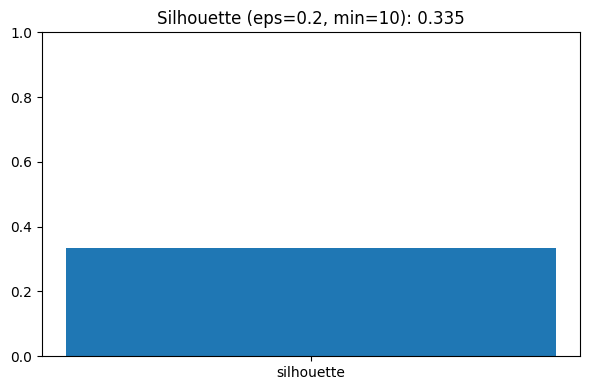

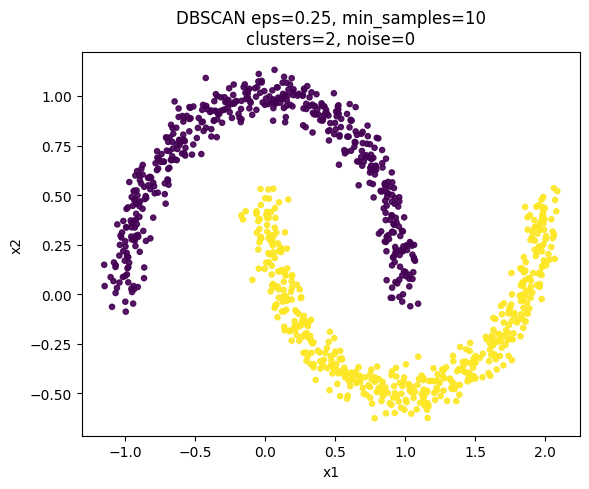

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


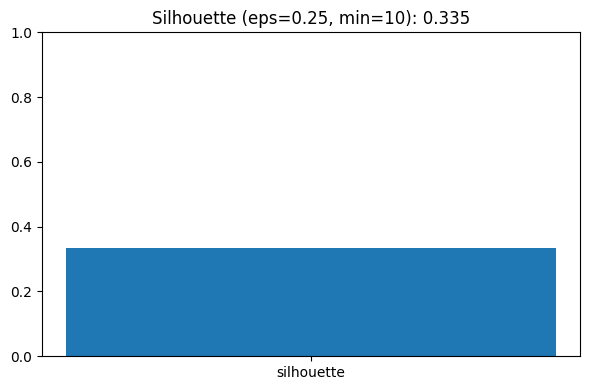

In [ ]:
params = [
    {"eps":0.1, "min_samples":5},
    {"eps":0.15, "min_samples":5},
    {"eps":0.2, "min_samples":5},
    {"eps":0.2, "min_samples":10},
    {"eps":0.25, "min_samples":10},
]
for p in params:
    db = DBSCAN(eps=p["eps"], min_samples=p["min_samples"]).fit(X_moons)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = (labels == -1).sum()
    scatter_labels(X_moons, labels, f"DBSCAN eps={p['eps']}, min_samples={p['min_samples']}\nclusters={n_clusters}, noise={n_noise}")
    silhouette_on_nonnoise(X_moons, labels, title=f"Silhouette (eps={p['eps']}, min={p['min_samples']})")

## 4) Effect of feature scaling (stretched blobs)

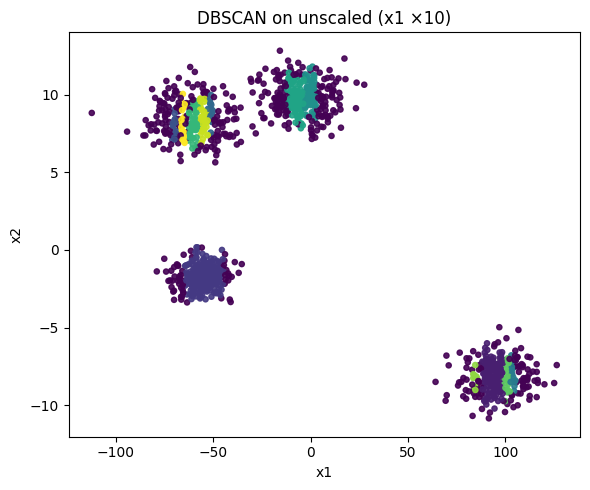

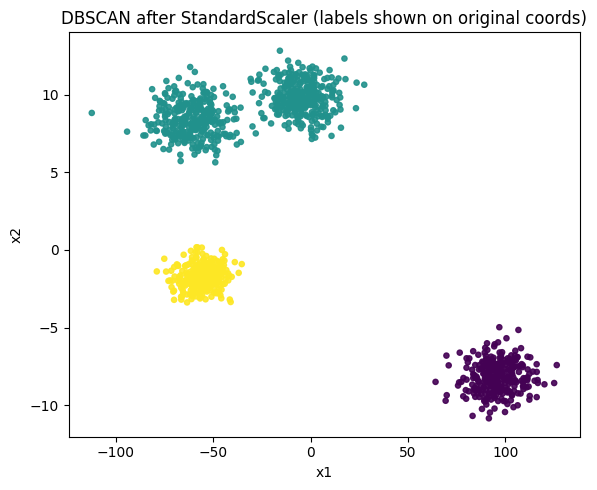

In [ ]:
X_blobs, _ = make_blobs(n_samples=1200, centers=4, cluster_std=[0.7, 0.9, 1.0, 1.1], random_state=2026)
X_stretch = X_blobs.copy(); X_stretch[:,0] *= 10.0

# Without scaling
db_raw = DBSCAN(eps=1.0, min_samples=10).fit(X_stretch)
scatter_labels(X_stretch, db_raw.labels_, "DBSCAN on unscaled (x1 ×10)")

# With StandardScaler
pipeX = StandardScaler().fit_transform(X_stretch)
db_scaled = DBSCAN(eps=0.5, min_samples=10).fit(pipeX)
scatter_labels(X_stretch, db_scaled.labels_, "DBSCAN after StandardScaler (labels shown on original coords)")

## 5) Compare DBSCAN vs K-Means on moons

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/p

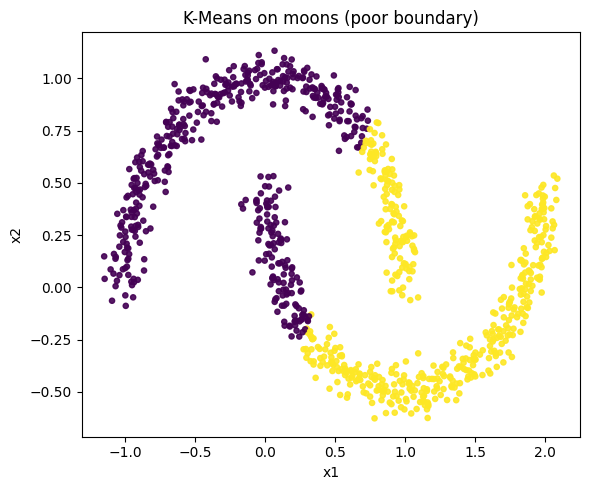

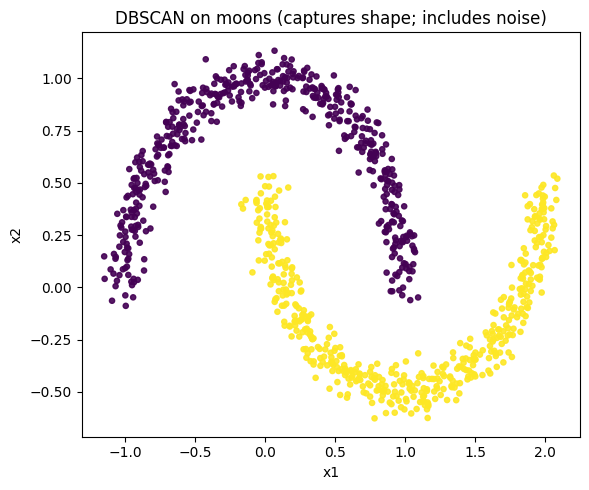

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


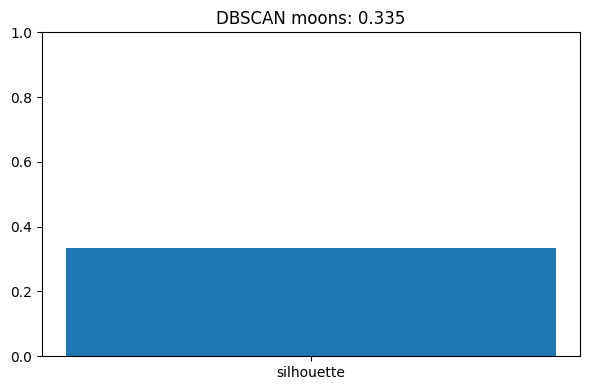

In [ ]:
km = KMeans(n_clusters=2, n_init=20, random_state=2026).fit(X_moons)
labels_km = km.labels_
scatter_labels(X_moons, labels_km, "K-Means on moons (poor boundary)")

db = DBSCAN(eps=0.2, min_samples=10).fit(X_moons)
labels_db = db.labels_
scatter_labels(X_moons, labels_db, "DBSCAN on moons (captures shape; includes noise)")
silhouette_on_nonnoise(X_moons, labels_db, title="DBSCAN moons")

## 6) HDBSCAN — hierarchical density clustering (if installed)

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


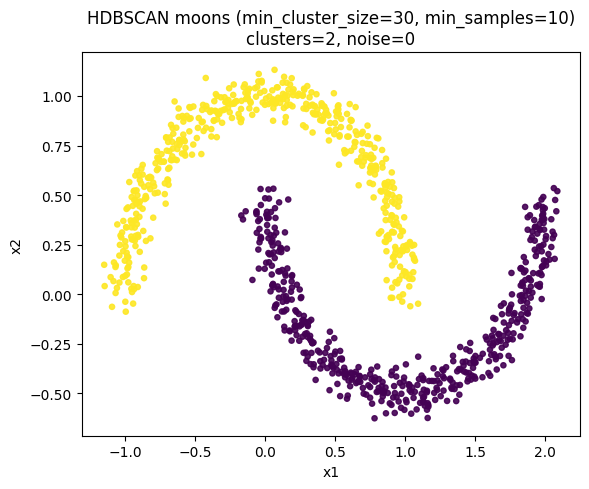

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


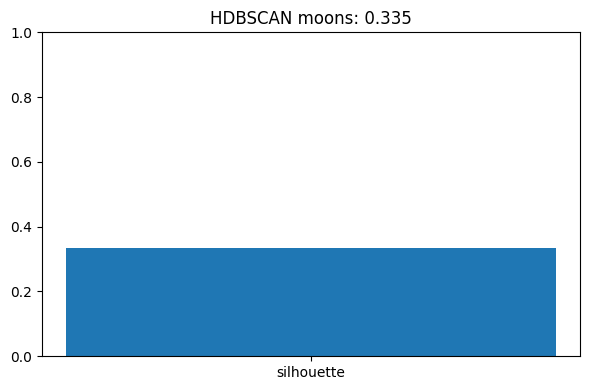

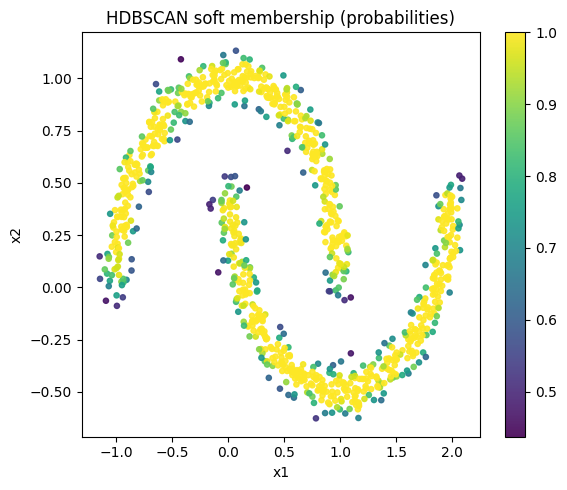

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


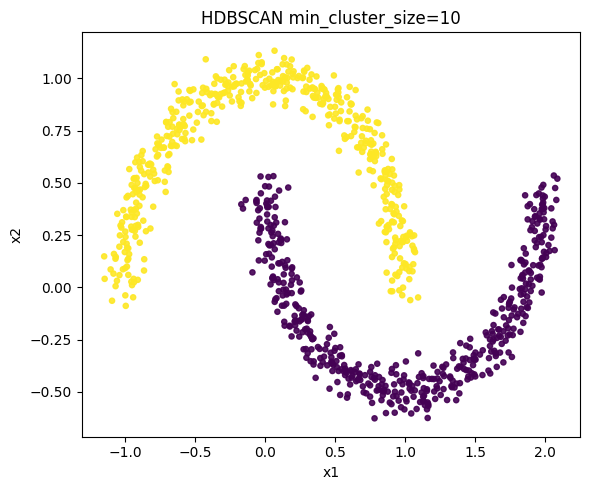

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


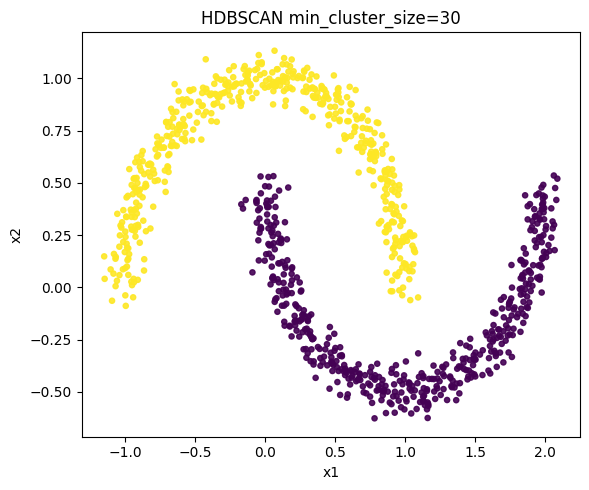

/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


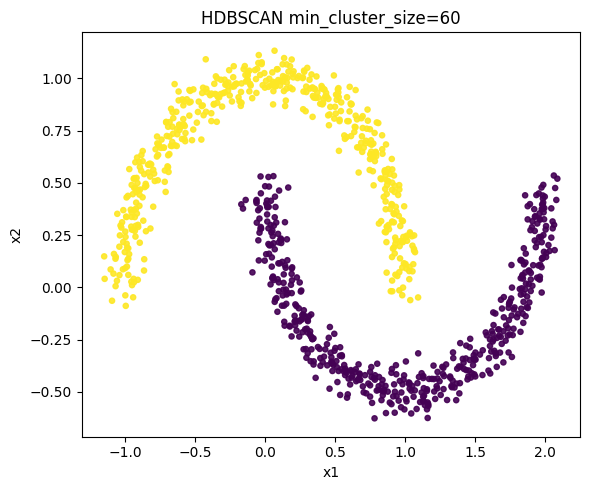

In [ ]:
if HDBSCAN_AVAILABLE:
    # Basic HDBSCAN on moons
    clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10, cluster_selection_epsilon=0.0)
    labels_h = clusterer.fit_predict(X_moons)
    scatter_labels(X_moons, labels_h, f"HDBSCAN moons (min_cluster_size=30, min_samples=10)\nclusters={len(np.unique(labels_h)) - (1 if -1 in labels_h else 0)}, noise={(labels_h==-1).sum()}")
    silhouette_on_nonnoise(X_moons, labels_h, title="HDBSCAN moons")

    # Soft cluster membership probabilities
    if hasattr(clusterer, "probabilities_"):
        probs = clusterer.probabilities_
        plt.figure(figsize=(6,5))
        plt.scatter(X_moons[:,0], X_moons[:,1], c=probs, s=14, alpha=0.9)
        plt.colorbar(); plt.title("HDBSCAN soft membership (probabilities)")
        plt.xlabel("x1"); plt.ylabel("x2"); plt.tight_layout(); plt.show()

    # Parameter sweep: min_cluster_size
    for mcs in [10, 30, 60]:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=10)
        labels_h = clusterer.fit_predict(X_moons)
        scatter_labels(X_moons, labels_h, f"HDBSCAN min_cluster_size={mcs}")
else:
    print("HDBSCAN not available. To enable these demos, install with: pip install hdbscan")